<a href="https://colab.research.google.com/github/Poredaka1020/Projects_Data_Science/blob/main/Projet_Analyse_et_Data_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet d'Analyse et Visualisation des Données** (Data Science)

## **Présentation**
Les classements des films en lignes sont devenus une affaire sérieuse dans la quelle faire confiance aux critiques et aux évaluations de ces plateformes devient délicat, surtout si les entreprises affichant ces notes gagnent de l'argent en vendant des billets de cinéma.

Est-ce que l'entreprise a tendance à sur-évaluer les films avec de meilleures notes que celles qu'ils devraient obtenir ?

*Dans ce présent projet, nous allons examiner les notes affichées sur les sites
de classement des films en ligne à l'aide de pandas, seaborn et matplotlib*


## **Objectif:** 
**Utilisation des compétences en pandas et en data viz pour déterminer si les notes de Fandango en 2015 étaient orientées vers une meilleure notation/évaluation des films dans le but de vendre plus de billets.**

## **Principale question :**
**Est-ce que Fandango gonflait artificiellement les évaluations sur son site afin de pouvoir vendre plus de billets par rapport aux autres sites d'évaluation de films ?**

## **Références :**
**L'article du site 538 (Be Suspicious Of Online Movie Ratings, Especially Fandango’s)**

Lien : https://fivethirtyeight.com/features/fandango-movies-ratings/

## **Partie 1 : Comprendre le contexte et les données**

Lire l'article de référence ci-dessus

----
### **Les données**

Ce sont les données derrière l'histoire de l'article [Be Suspicious Of Online Movie Ratings, en particulier Fandango](http://fivethirtyeight.com/features/fandango-movies-ratings/) disponible publiquement sur : https://github.com/fivethirtyeight/data. 

Il existe deux fichiers csv, l'un avec les Stars (étoiles affichées sur le site web) et les Ratings (notes réelles données par les utilisateurs) affichés sur Fandango, et l'autre avec des données agrégées pour les notations/évaluations de films d'autres sites, tels que Metacritic, IMDB et Rotten Tomatoes.

---

#### all_sites_scores.csv

`all_sites_scores.csv` contient tous les films qui ont une note Rotten Tomatoes, une note RT User, une note Metacritic, une note Metacritic User, une note IMDb, et au moins 30 critiques de fans sur Fandango. Les données de Fandango ont été extraites le 24 août 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

---

#### fandango_scrape.csv

`fandango_scrape.csv` contient tous les films de l'article 538 tirés de Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

### **Importation des bibliothèques necéssaires**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Partie 2 : Exploration des scores affichés par Fandango par rapport aux évaluations des utilisateurs réels**

Examinons d'abord les notes de Fandango pour voir si notre analyse est en accord avec la conclusion de l'article.

In [ ]:
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/fandango_scrape.csv'
fandango = pd.read_csv(url)
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [ ]:
fandango.tail()

,FILM,STARS,RATING,VOTES
499,Valiyavan (2015),0.0,0.0,0
500,WWE SummerSlam 2015 (2015),0.0,0.0,0
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0
503,Zarafa (2012),0.0,0.0,0


In [ ]:
# Avoir des informations sur des colonnes
fandango.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [ ]:
# Avoir une statistique descriptive sur les données
fandango.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**Tâche : Explorons la relation entre la popularité d'un film et son classement. Pour celà, nous créons un nuage de points montrant la relation entre les notes et les votes.**

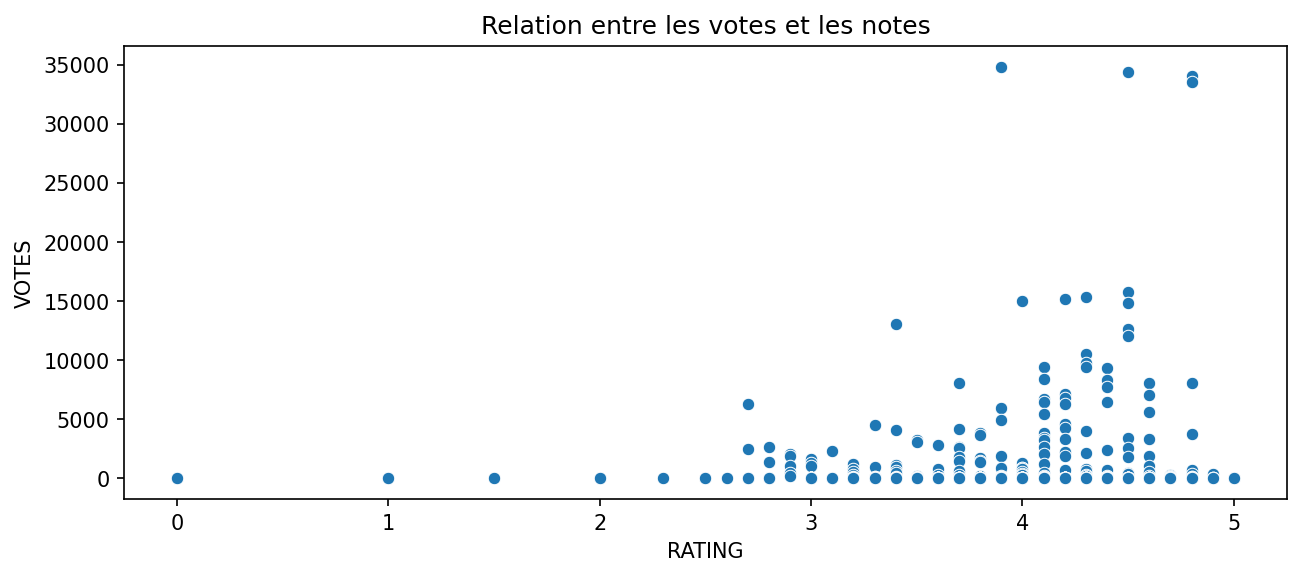

In [ ]:
# Modification des propriétés de la figure
plt.figure(figsize=(10, 4), dpi=150)
plt.title('Relation entre les votes et les notes')
sns.scatterplot(data=fandango, x='RATING', y='VOTES');

**Interprétation:** nous pouvons dire qu'il n'y a pas de rélation linéaire entre la popularité d'un film et son classement, ça veut dire que la popularité ne dépend pas forcement du classement (notes des utilisateurs)

**Tâche : Calcul de la corrélation entre les colonnes/features :**

In [ ]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**Tâche : En supposant que chaque ligne de la colonne FILM ait le même format :**

    Nom du titre du film (Année)
    
**Créons une nouvelle colonne contenant l'année de chaque film et définissons cette nouvelle colonne avec le nom YEAR**

In [ ]:
# Première solution (avec l'appel à l'attribut .str)
#fandango['YEAR'] = fandango['FILM'].str.split('(').str[-1].str.replace(')', '')

In [ ]:
# Deuxième solution (avec l'application de la methode .apply() qui nous permet d'appliquer une fonction directement à des variables)
title = 'Nom du titre du film (Année)'
fandango['YEAR'] = fandango['FILM'].apply(lambda title: title.split('(')[-1].replace(')', ''))

In [ ]:
fandango['YEAR']

0      2015
1      2015
2      2015
3      2015
4      2015
       ... 
499    2015
500    2015
501    2015
502    1964
503    2012
Name: YEAR, Length: 504, dtype: object

**Tâche : Combien de films y a-t-il par année dans le DataFrame Fandango ?**

In [ ]:
# A noter que les données de Fandango ont été extraites en 2015, donc sans doute, on aura le plus de données en cette année là
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**Tâche : Visualisons le nombre de films par an avec un graphique :**

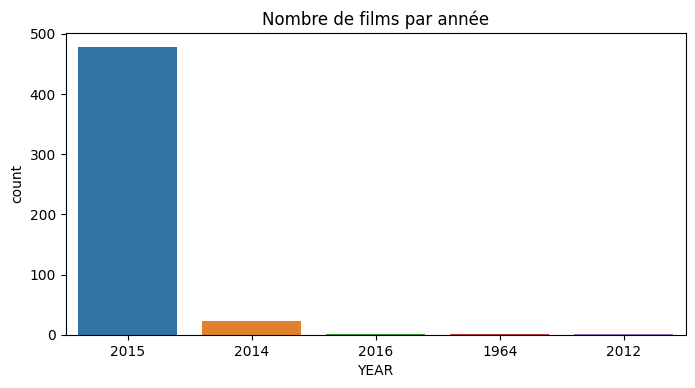

In [ ]:
# Ajustement des propriétés de la figure (taille, résolution et titre)
plt.figure(figsize=(8, 4), dpi=100)
plt.title("Nombre de films par année")

sns.countplot(data=fandango, x='YEAR');

**Tâche : Quels sont les 10 films ayant obtenu le plus grand nombre de votes ?**

In [ ]:
fandango.nlargest(n=10, columns='VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**Tâche : Combien de films n'ont aucun avis/vote ?**

In [ ]:
# 1ère solution
len(fandango[fandango['VOTES'] == 0])

69

In [ ]:
# 2ème solution
(fandango['VOTES'] == 0).sum()

69

**Tâche : Créons un DataFrame avec uniquement des films évalués (en supprimant tous les films qui n'ont aucun vote).**

In [ ]:
fandango = fandango[fandango['VOTES'] > 0]

In [ ]:
len(fandango)

435

----

**Comme indiqué dans l'article, en raison de l'affichage HTML et du classement par étoiles, la note réelle de l'utilisateur peut être légèrement différente de celle affichée à un utilisateur. Visualisons cette différence avec des distributions.**

**Tâche : Créons un diagramme KDE (ou plusieurs kdeplots) qui affiche la distribution des notes affichées (STARS) par rapport à l'évaluation réelle des votes (RATING). Limitons les KDE à 0-5.**

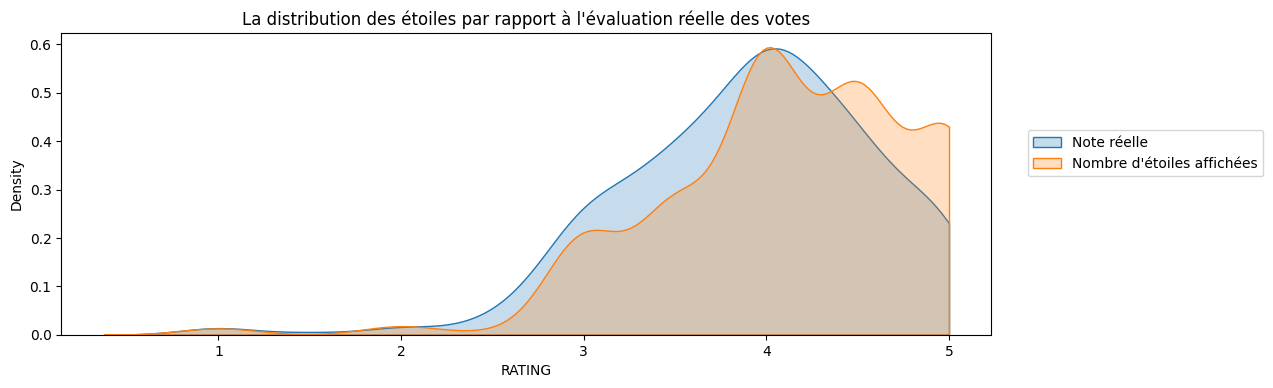

In [ ]:
plt.figure(figsize=(12, 4), dpi=100)
plt.title("La distribution des étoiles par rapport à l'évaluation réelle des votes")

sns.kdeplot(data=fandango, x='RATING', fill=True, clip=[0, 5], label="Note réelle")
sns.kdeplot(data=fandango, x='STARS', fill=True, clip=[0, 5], label="Nombre d'étoiles affichées")
plt.legend(bbox_to_anchor=(1.3, 0.7));

**Remarque :** nous pouvons voir que le nombre d'étoiles (STARS) est biaisé, parce qu'il n'est pas conforme au nombre de votes (RATING)

**Tâche : Quantifions maintenant cet écart. Pour celà, créons une nouvelle colonne de la différence entre les étoiles affichées (STARS) et les notes réelles (RATING). Calculons cette différence avec STARS-RATING et arrondissons-la à la décimale la plus proche.**

In [ ]:
fandango['STARS_DIFF'] = np.round(fandango['STARS'] - fandango['RATING'], 1)

In [ ]:
fandango

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


**Tâche : Créons un diagramme de comptage (countplot) pour afficher le nombre de fois qu'une certaine différence se produit.**

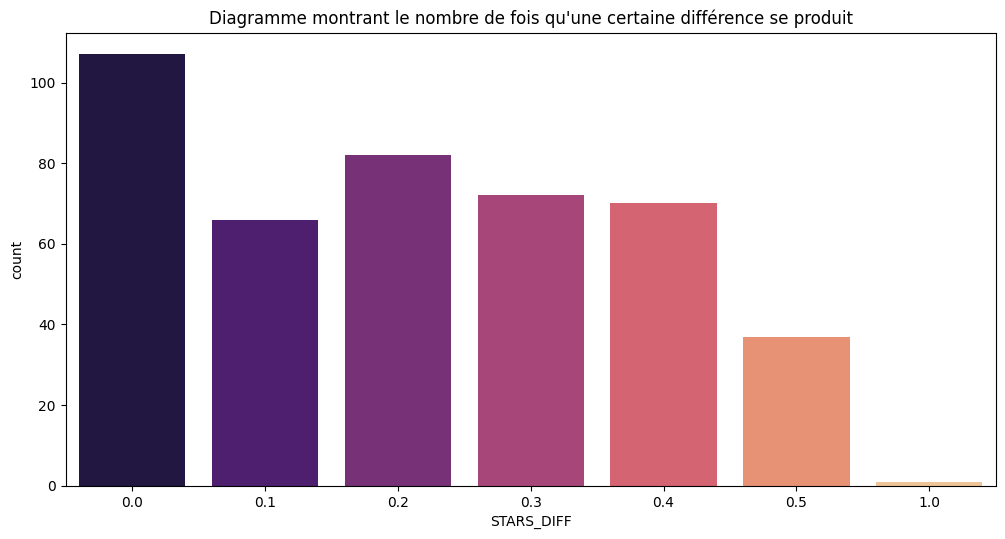

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Diagramme montrant le nombre de fois qu'une certaine différence se produit")

sns.countplot(data=fandango, x='STARS_DIFF', palette='magma');

**Remarque :** nous voyons sur ce diagramme que dans la plus part des cas, cette différence se produit (plus de **70%**)

**Tâche : Nous pouvons voir sur le diagramme précédent qu'un film affichait une différence d'une étoile par rapport à sa véritable note ! Quel film a eu ce différentiel proche d'une étoile ?**

In [ ]:
fandango[fandango['STARS_DIFF'] == 1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## **Partie 3 : Comparaison des évaluations de Fandango avec d'autres plateformes**

Comparons maintenant les scores de Fandango à d'autres sites d'évaluation de films et voyons comment ils se comparent.


**Tâche : Lisons le fichier "all_sites_scores.csv" en exécutant la cellule ci-dessous**

In [ ]:
 # Lecture du fichier all_sites_scores.csv dans le dataframe all_sites
url = 'https://raw.githubusercontent.com/moncoachdata/MasterClass_DS_ML/main/all_sites_scores.csv'
all_sites = pd.read_csv(url)

**Tâche : Explorons les colonnes du DataFrame, ses informations, sa description statistiques.**

In [ ]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [ ]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [ ]:
all_sites.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### **Rotten Tomatoes**

Jetons d'abord un coup d'œil à Rotten Tomatoes. RT a deux séries de critiques, leurs critiques (évaluations publiées par les critiques officielles) et les avis des utilisateurs. 

**Tâche : Créons un nuage de points explorant la relation entre les avis des critiques RT et les avis des utilisateurs RT.**

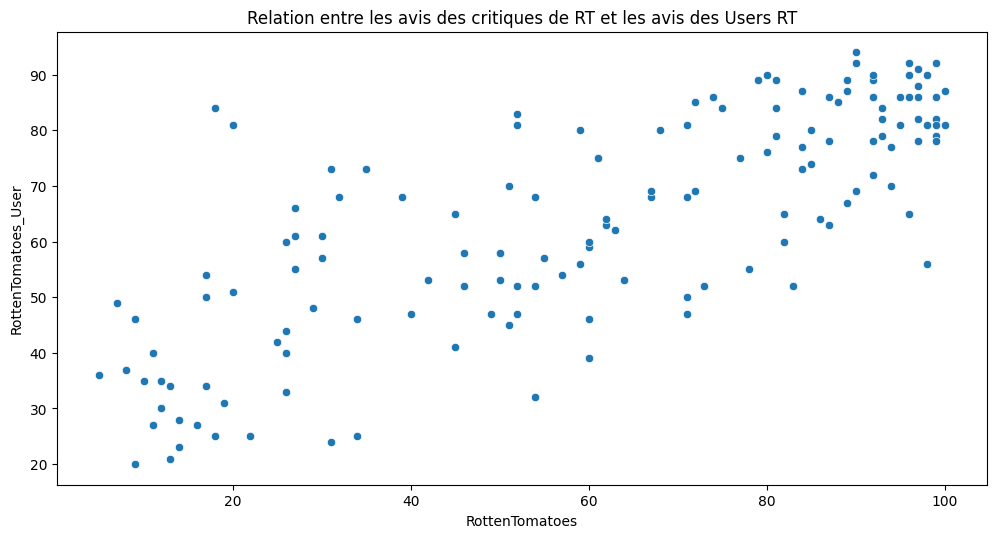

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Relation entre les avis des critiques de RT et les avis des Users RT")

sns.scatterplot(data=all_sites, x='RottenTomatoes', y='RottenTomatoes_User');

Quantifions cette différence en comparant les notes des critiques et celles des utilisateurs RT. Nous allons calculer cela avec RottenTomatoes-RottenTomatoes_User. 

**Remarque** : Rotten_Diff est ici RottenTomatoes (notes des critiques de RT) - RottenTomatoes_User (notes des utilisateurs de RT). Les valeurs proches de 0 signifient donc un accord entre les critiques et les utilisateurs. Des valeurs positives plus élevées signifient que les critiques ont obtenu une note beaucoup plus élevée que les utilisateurs. Des valeurs négatives plus élevées signifient que les utilisateurs ont obtenu une note beaucoup plus élevée que les critiques


**Tâche : Créons une nouvelle colonne basée sur la différence entre les notes des critiques et les notes des utilisateurs pour Rotten Tomatoes. Calculons ceci avec RottenTomatoes-RottenTomatoes_User**

In [ ]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [ ]:
all_sites['Rotten_Diff']

0     -12
1       5
2     -10
3     -66
4     -14
       ..
141     9
142    15
143    19
144    19
145    24
Name: Rotten_Diff, Length: 146, dtype: int64

Comparons maintenant la différence moyenne globale. Puisque nous avons à faire à des différences qui peuvent être négatives ou positives, nous prenons d'abord la valeur absolue de toutes les différences, puis la moyenne de cette valeur. Cela retournera la moyenne des valeurs absolues de la différence entre la note des critiques et la note des utilisateurs.

**Tâche : Calculons la différence absolue moyenne entre les notes RT et les notes des utilisateurs RT comme décrit ci-dessus.**

In [ ]:
# 1ère solution
np.mean(np.abs(all_sites['Rotten_Diff']))

15.095890410958905

In [ ]:
# 2ème solution
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

**Tâche : Traçons la distribution des différences entre la note des critiques RT et la note des utilisateurs RT. Ce diagramme de distribution doit comporter des valeurs négatives. N'hésitez pas à utiliser une courbe KDE ou un histogramme pour afficher cette distribution.**

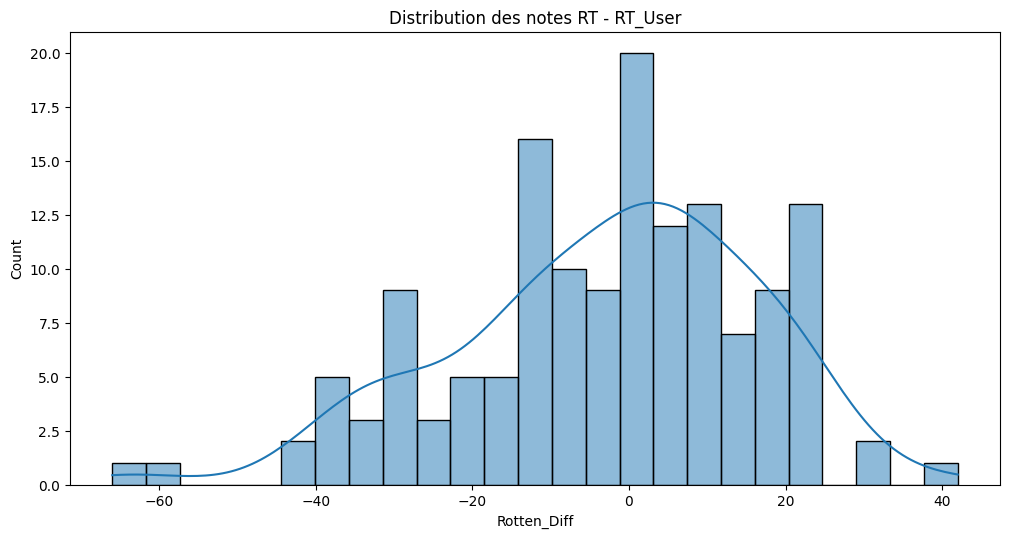

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Distribution des notes RT - RT_User")

sns.histplot(data=all_sites, x='Rotten_Diff', bins=25, kde=True);


**Tâche : Créons maintenant une distribution montrant la *valeur absolue* de la différence des notes entre les critiques et les utilisateurs sur Rotten Tomatoes.**

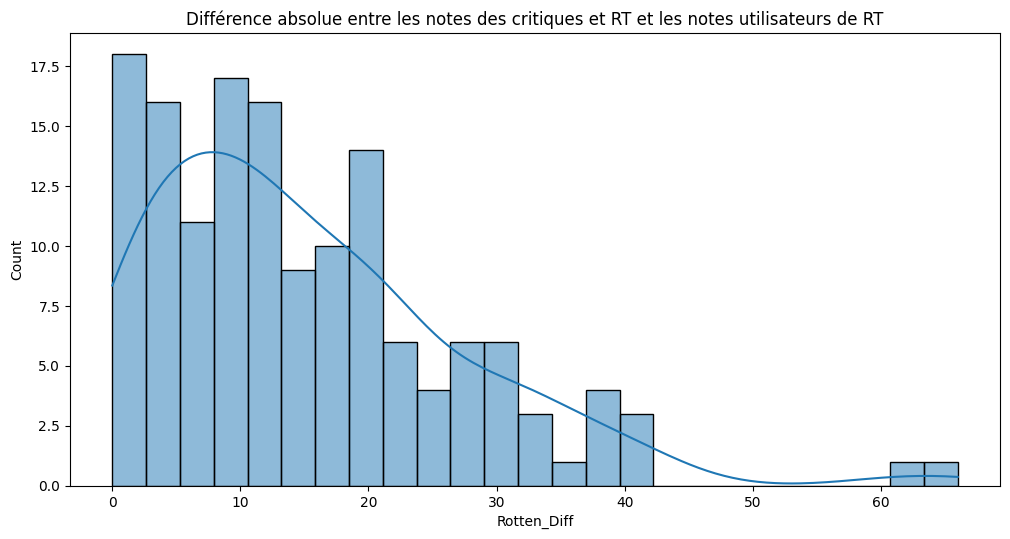

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Différence absolue entre les notes des critiques et RT et les notes utilisateurs de RT")

sns.histplot(data=all_sites, x=np.abs(all_sites['Rotten_Diff']), bins=25, kde=True);

**Voyons quels films sont à l'origine des différences les plus importantes. Tout d'abord, montrons les 5 meilleurs films présentant la plus grande différence *négative* entre les utilisateurs et les critiques de RT. Puisque nous avons calculé la différence en tant que (Notes des Critiques - Notes des Utilisateurs), les grandes valeurs négatives impliquent que les utilisateurs ont évalué le film beaucoup plus haut en moyenne que les critiques.**

**Tâche : Quels sont le top 5 des films qui ont obtenu une note moyenne des utilisateurs supérieure à celle des critiques :**

In [ ]:
# 1ère solution
print("Les utilisateurs adorent, mais les critiques détestent")
all_sites.nsmallest(n=5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

Les utilisateurs adorent, mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


In [ ]:
# 2ème solution
print("Les utilisateurs adorent, mais les critiques détestent")
all_sites[all_sites['RottenTomatoes_User'] > all_sites['RottenTomatoes']][['FILM', 'Rotten_Diff']].sort_values(by='Rotten_Diff').iloc[:5] 

Les utilisateurs adorent, mais les critiques détestent


,FILM,Rotten_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39


**Tâche : Affichons maintenant le top 5 des films qui ont obtenu une note moyenne des critiques supérieure à celle des utilisateurs.**

In [ ]:
# 1ère solution
print("Les critiques adorent, mais les utilisateurs détestent")
all_sites.nlargest(n=5, columns='Rotten_Diff')[['FILM', 'Rotten_Diff']]

Les critiques adorent, mais les utilisateurs détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


In [ ]:
# 2ème solution
print("Les critiques adorent, mais les utilisateurs détestent")
all_sites[all_sites['RottenTomatoes'] > all_sites['RottenTomatoes_User']][['FILM', 'Rotten_Diff']].sort_values(by='Rotten_Diff', ascending=False).iloc[:5]

Les critiques adorent, mais les utilisateurs détestent


,FILM,Rotten_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
40,I'll See You In My Dreams (2015),24


### **MetaCritic**

Regardons maintenant les notes de MetaCritic. MetaCritic affiche également une note moyenne des utilisateurs par rapport à leur note officielle affichée.

**Tâche : Créons un nuage de points de la note MetaCritic par rapport à la note Metacritic des utilisateurs.**

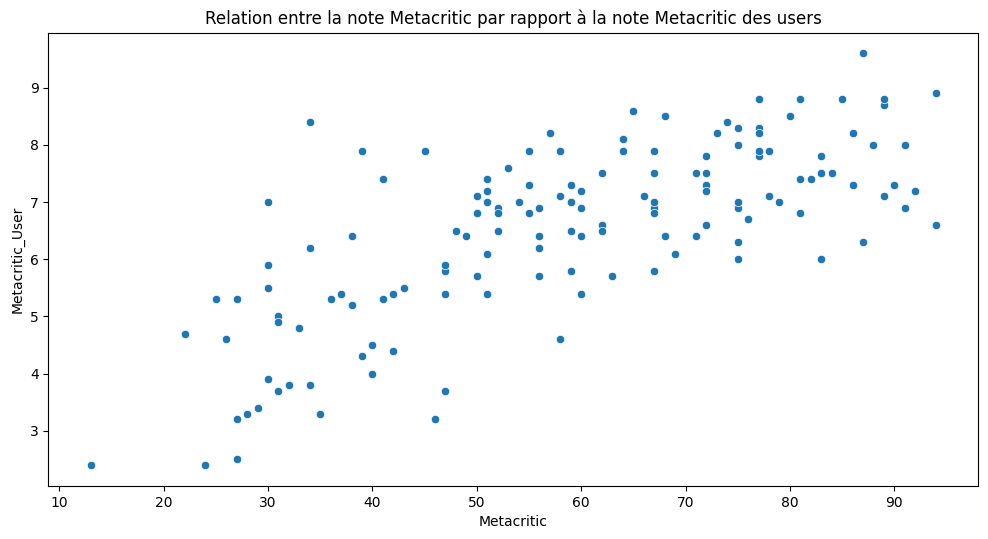

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Relation entre la note Metacritic par rapport à la note Metacritic des users")

sns.scatterplot(data=all_sites, x='Metacritic', y='Metacritic_User');

### IMDb

Enfin, explorons IMDb. Notez que Metacritic et IMDb offrent le nombre de votes. Analysons les films les plus populaires.


**Tâche : Créons un nuage de points montrant la relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb.**

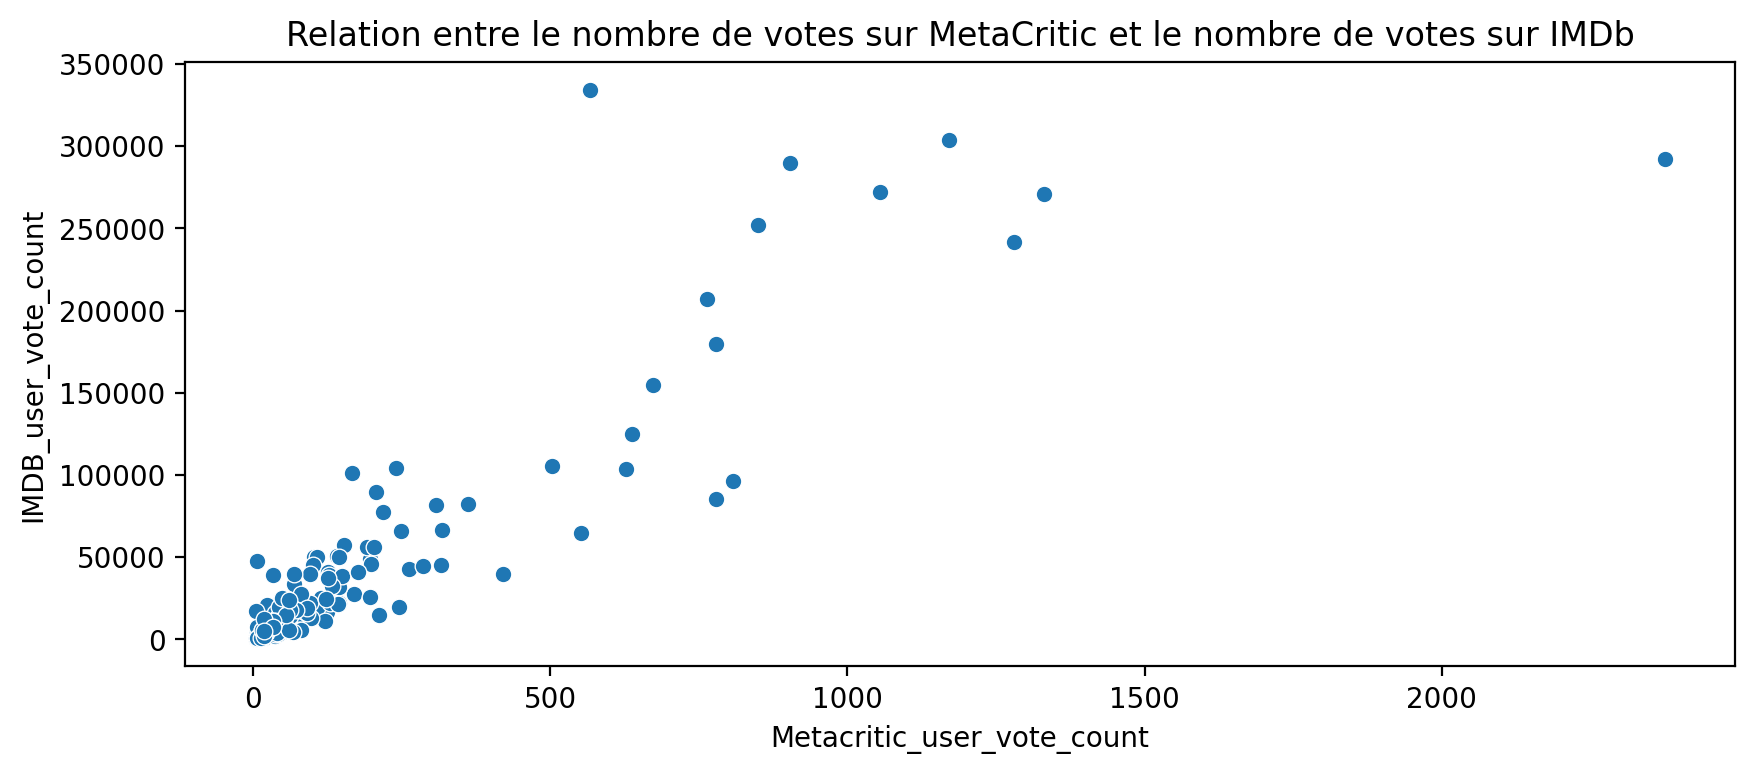

In [ ]:
plt.figure(figsize=(10, 4), dpi=200)
plt.title("Relation entre le nombre de votes sur MetaCritic et le nombre de votes sur IMDb")

sns.scatterplot(data=all_sites, x='Metacritic_user_vote_count', y='IMDB_user_vote_count');

**Notez qu'il y a deux valeurs aberrantes (outliers) ici. Le film ayant obtenu le plus grand nombre de votes sur IMDb n'a qu'environ 500 notes MetaCritic. Quel est ce film ?**

**Tâche : Quel film a le plus grand nombre de votes des utilisateurs IMDd ?**

In [ ]:
# 1ère solution
all_sites.nlargest(n=1, columns='IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [ ]:
# 2ème solution
all_sites.iloc[all_sites['IMDB_user_vote_count'].idxmax()]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_Diff                                          -2
Name: 14, dtype: object

**Tâche : Quel film a le plus grand nombre de votes des utilisateurs MetaCritic ?**

*Note :* c'est le film le plus populaire dans les 2 plateformes

In [ ]:
# 1ère solution
all_sites.nlargest(n=1, columns='Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


In [ ]:
# 2ème solution
all_sites.iloc[all_sites['Metacritic_user_vote_count'].idxmax()]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Rotten_Diff                                           9
Name: 88, dtype: object

### **Notes Fandago vs. Autres Plateformes**

Pour finir, commençons à examiner si Fandango affiche artificiellement des notes supérieures aux autres sites de critiques de film pour augmenter les ventes de billets.

**Tâche : Combinons la table Fandango avec la table all_sites. Tous les films de la table Fandango ne sont pas dans la table all_sites, car certains films de Fandango ont très peu ou pas de critiques. Nous voulons uniquement comparer les films qui se trouvent dans les deux DataFrames, donc effectuons une fusion *inner* pour fusionner les deux DataFrames en fonction des colonnes FILM.**

In [ ]:
rate_scores = pd.merge(left=fandango, right=all_sites, on='FILM')

In [ ]:
rate_scores.drop('STARS_DIFF', axis=1, inplace=True)

In [ ]:
rate_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
dtypes: float64(4), int64(7), object(2)


In [ ]:
rate_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8


### **Normalisation des colonnes comme celles de STARS et RATINGS de Fandango sur l'échelle 0-5**

Notez que RT, MetaCritic et IMDb n'utilisent pas un score (note) compris entre 0 et 5 étoiles comme le fait Fandango. Pour faire une comparaison équitable, nous devons *normaliser* ces valeurs afin qu'elles se situent toutes entre 0 et 5 étoiles et que la relation entre les avis reste la même.

**Tâche : Créons de nouvelles colonnes normalisées pour toutes les notes afin qu'elles correspondent à la plage de 0 à 5 étoiles affichée sur Fandango. Il existe de nombreuses façons de procéder.**

Lien indice : https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Astuce plus facile, gardez à l'esprit qu'il s'agit d'un moyen simple de convertir les notes :
* 100/20 = 5 
* 10/2 = 5

In [ ]:
# Création des nouvelles colonnes normalisées

rate_scores['RT_Norm'] = np.round(rate_scores['RottenTomatoes']/20, 1)

rate_scores['RTU_Norm'] = np.round(rate_scores['RottenTomatoes_User']/20, 1)

rate_scores['Meta_Norm'] = np.round(rate_scores['Metacritic']/20, 1)

rate_scores['Meta_U_Norm'] = np.round(rate_scores['Metacritic_User']/2, 1)

rate_scores['IMDB_Norm'] = np.round(rate_scores['IMDB']/2, 1)

In [ ]:
rate_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   RottenTomatoes              145 non-null    int64  
 6   RottenTomatoes_User         145 non-null    int64  
 7   Metacritic                  145 non-null    int64  
 8   Metacritic_User             145 non-null    float64
 9   IMDB                        145 non-null    float64
 10  Metacritic_user_vote_count  145 non-null    int64  
 11  IMDB_user_vote_count        145 non-null    int64  
 12  Rotten_Diff                 145 non-null    int64  
 13  RT_Norm                     145 non

In [ ]:
rate_scores.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


**Tâche : Créons maintenant un DataFrame norm_scores qui ne contient que les notes normalisées. Incluez à la fois STARS et RATING de la table Fandango d'origine.**

In [ ]:
norm_scores = rate_scores[['STARS', 'RATING', 'RT_Norm', 'RTU_Norm', 'Meta_Norm', 'Meta_U_Norm', 'IMDB_Norm']]

In [ ]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3


### **Comparaison de la distribution des notes entre les sites**


**Maintenant, c'est le moment de vérité !** Est-ce que Fandango affiche des notes anormalement élevées ? Nous savons déjà que Fandango affiche une note STARS sous forme d'étoiles plus haute que la note réelle RATING, mais les notes elles-mêmes sont-elles supérieures à la moyenne de toutes les plateformes d'évaluations et critiques de films ?


**Tâche : Créons un diagramme comparant les distributions des notes normalisées sur tous les sites. Il existe de nombreuses façons de le faire, mais explorons la documentation Seaborn KdePlot pour trouver des moyens simples de le montrer rapidement.**

Note rapide si vous rencontrez des problèmes pour déplacer la légende d'un kdeplot Seaborn : https://github.com/mwaskom/seaborn/issues/2280

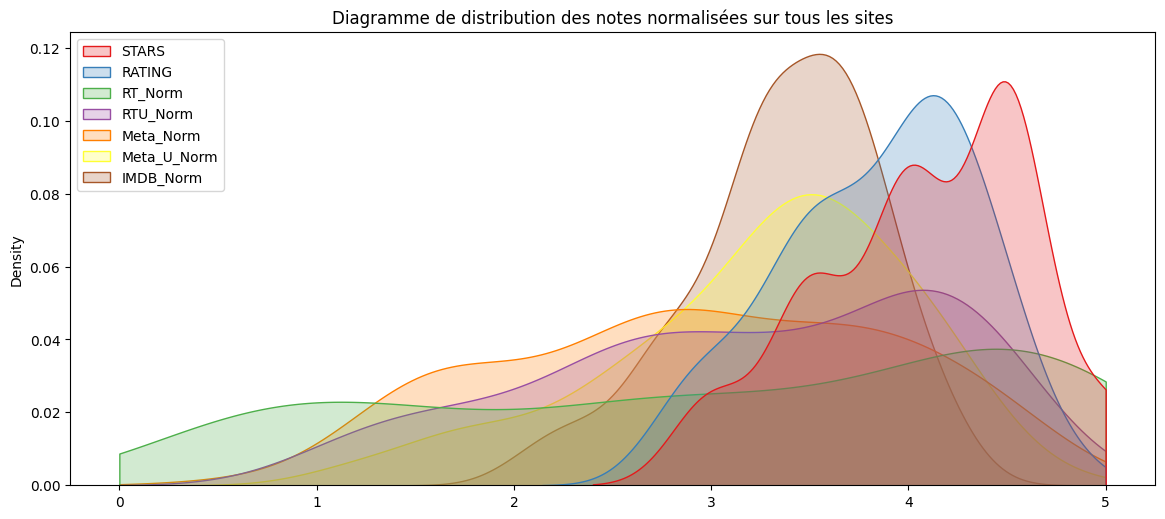

In [ ]:
plt.figure(figsize=(14, 6), dpi=100)
plt.title("Diagramme de distribution des notes normalisées sur tous les sites")

ax = sns.kdeplot(data=norm_scores, clip=[0, 5], fill=True, palette='Set1')

# Fonction permettant de déplacer la legende du kde
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    
move_legend(ax, "upper left");

**Il est clair que la distribution de Fandango est inégale. Nous pouvons également constater que les critiques de RT ont la distribution la plus uniforme. Comparons directement ces deux-là.**

**Tâche : Créons un diagramme KDE qui compare la distribution des notes des critiques RT avec les STARS affichées par Fandango.**

In [ ]:
RT_Fand = norm_scores[['STARS', 'RT_Norm']]

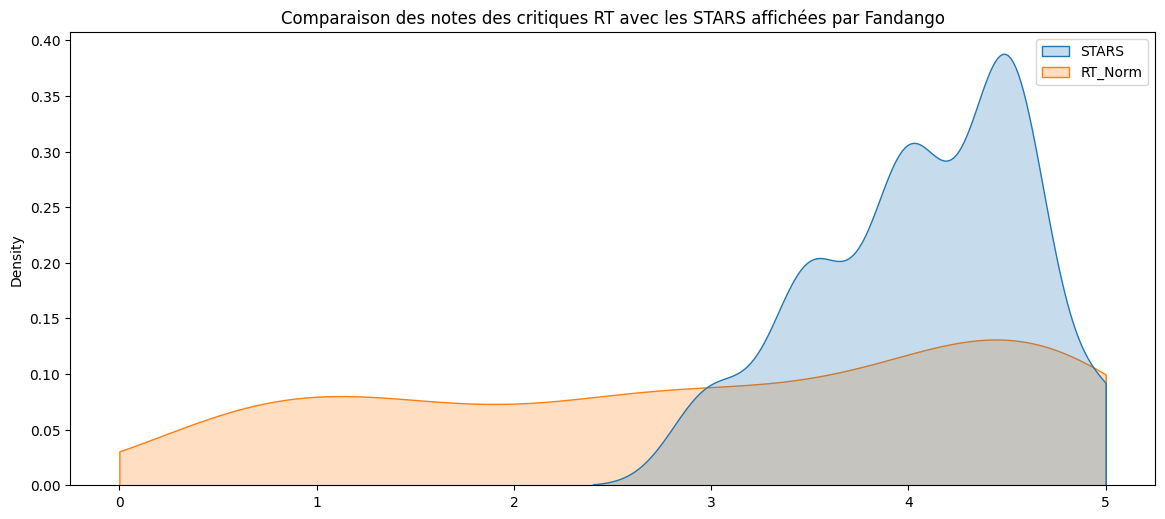

In [ ]:
plt.figure(figsize=(14, 6), dpi=100)
plt.title("Comparaison des notes des critiques RT avec les STARS affichées par Fandango")

sns.kdeplot(data=RT_Fand, clip=[0, 5], fill=True);

**Tâche facultative : Créons un histogramme comparant toutes les notes normalisées.**

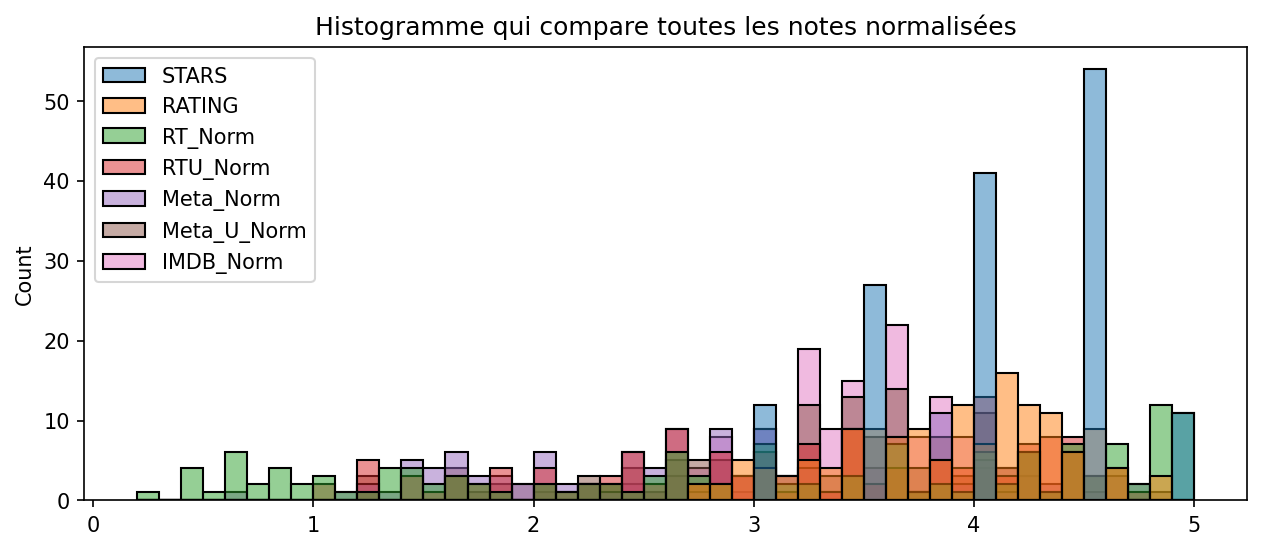

In [ ]:
plt.figure(figsize=(10, 4), dpi=150)
plt.title("Histogramme qui compare toutes les notes normalisées")

sns.histplot(data=norm_scores, bins=48);

### **Comment sont évalués les pires films sur toutes les plateformes ?**

**Tâche : Créons une visualisation de clustermap de toutes les notes normalisées. Notez les différences de notation, les films les mieux notés doivent être regroupés par rapport aux films mal notés.**

**Remarque : Ce clustermap n'a pas besoin d'avoir les titres de FILM en tant qu'index, n'hésitez pas à le supprimer pour le clustermap.**

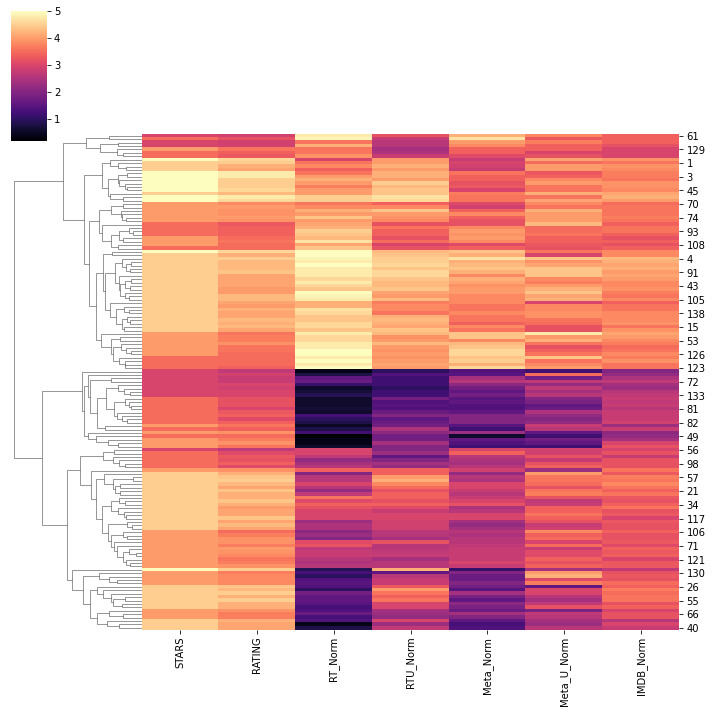

In [ ]:
sns.clustermap(data=norm_scores, col_cluster=False, cmap='magma');

**Tâche : Il est clair que Fandango note les films de façon beaucoup plus généreuse que les autres plateformes, surtout si l'on considère qu'il affiche alors une version arrondie de sa note. Examinons le top 10 des pires films. Sur la base des évaluations des critiques de Rotten Tomatoes, quels sont les 10 films les moins bien notés ? Quels sont les scores normalisés sur toutes les plateformes pour ces films ? Vous devrez peut-être ajouter la colonne FILM à votre DataFrame de scores (notes) normalisés pour voir les résultats.**

In [ ]:
norm_scores['FILM'] = rate_scores['FILM']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
norm_scores.head()

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1,Fifty Shades of Grey (2015)
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6,Jurassic World (2015)
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7,American Sniper (2015)
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7,Furious 7 (2015)
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3,Inside Out (2015)


In [ ]:
ten_bad_movies = norm_scores.nsmallest(n=10, columns='RT_Norm')
ten_bad_movies

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
49,3.5,3.5,0.2,1.8,0.6,1.2,2.2,Paul Blart: Mall Cop 2 (2015)
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)
28,3.0,2.7,0.4,1.0,1.4,1.2,2.0,Fantastic Four (2015)
54,4.0,3.7,0.4,1.8,1.6,1.8,2.4,Hot Pursuit (2015)
84,4.0,3.9,0.4,2.4,1.4,1.6,3.0,Hitman: Agent 47 (2015)
50,4.0,3.6,0.5,1.8,1.5,2.8,2.3,The Boy Next Door (2015)
77,3.5,3.2,0.6,1.8,1.5,2.0,2.8,Seventh Son (2015)
78,3.5,3.2,0.6,1.5,1.4,1.6,2.8,Mortdecai (2015)
83,3.5,3.3,0.6,1.7,1.6,2.5,2.8,Sinister 2 (2015)
87,3.5,3.2,0.6,1.4,1.6,1.9,2.7,Unfinished Business (2015)


**Tâche finale : Visualisons la distribution des notes sur toutes les plateformes pour les 10 films les plus mal notés par les critiques de RT.**

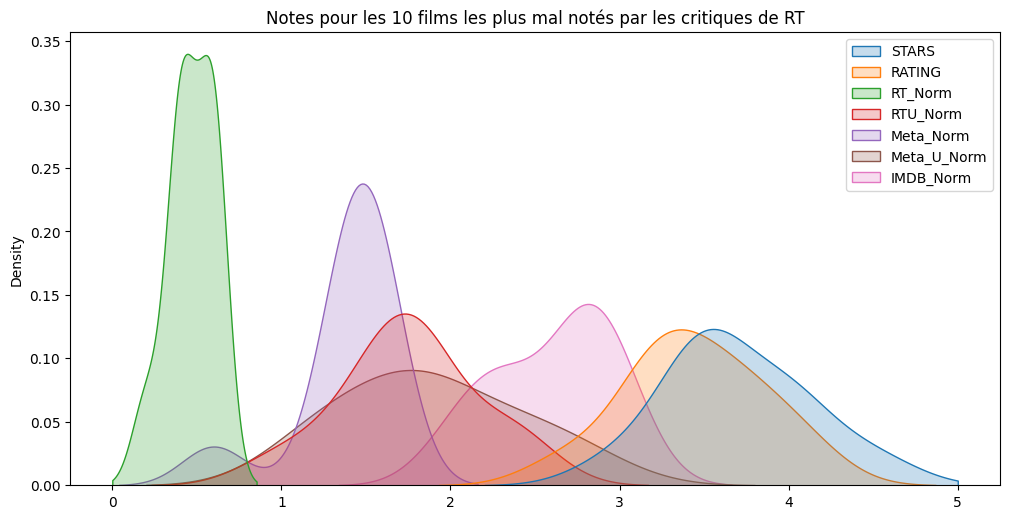

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Notes pour les 10 films les plus mal notés par les critiques de RT")

sns.kdeplot(data=ten_bad_movies, fill=True, clip=[0, 5]);

---
---
<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Réflexions finales : Wow ! Fandango affiche environ 3 à 4 étoiles pour des films clairement mauvais ! Remarquez le plus grand escroc : [Taken 3 !](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango affiche 4,5 étoiles sur son site pour un film avec une [note moyenne de 1,86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) sur les autres plateformes !**

In [ ]:
norm_scores[norm_scores['FILM'] == 'Taken 3 (2015)']

,STARS,RATING,RT_Norm,RTU_Norm,Meta_Norm,Meta_U_Norm,IMDB_Norm,FILM
25,4.5,4.1,0.4,2.3,1.3,2.3,3.0,Taken 3 (2015)


In [ ]:
0.4+2.3+1.3+2.3+3

9.3

In [ ]:
9.3/5

1.86